In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Retail Sales Analysis_utf.csv")

# Parse dates properly with dayfirst format
df['sale_date'] = pd.to_datetime(df['sale_date'], dayfirst=True)
df['sale_time'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S').dt.time

# Create shift column (in case needed later)
def determine_shift(t):
    hour = t.hour
    if hour <= 12:
        return 'Morning'
    elif 12 < hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'
df['shift'] = df['sale_time'].apply(determine_shift)


In [3]:
# Step 1: Feature engineering per customer
customer_df = df.groupby('customer_id').agg({
    'transactions_id': 'count',
    'quantity': 'mean',
    'total_sale': ['sum', 'mean']
}).reset_index()

# Rename columns
customer_df.columns = ['customer_id', 'num_orders', 'avg_quantity', 'total_sales', 'avg_order_value']
customer_df.head()


,customer_id,num_orders,avg_quantity,total_sales,avg_order_value
0,1,76,2.447368,30750.0,404.605263
1,2,69,2.231884,25295.0,366.594203
2,3,76,2.644737,38440.0,505.789474
3,4,73,2.246575,23580.0,323.013699
4,5,63,2.523810,30405.0,482.619048


In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
#Step 2: Normalize the features
from sklearn.preprocessing import StandardScaler

X = customer_df[['num_orders', 'avg_quantity', 'total_sales', 'avg_order_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#Step 3: Apply k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['cluster'] = kmeans.fit_predict(X_scaled)


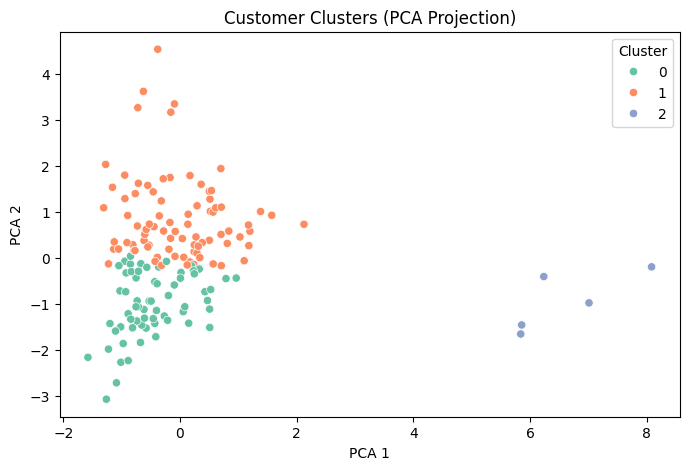

In [10]:
#Step 4: Visualize clusters using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_df['cluster'], palette='Set2')
plt.title("Customer Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

In [11]:
#Step 5: Analyze cluster behaviour
customer_df.groupby('cluster')[['num_orders', 'avg_quantity', 'total_sales', 'avg_order_value']].mean()

,num_orders,avg_quantity,total_sales,avg_order_value
cluster,,,,
0,10.818182,2.230354,3817.121212,346.606657
1,11.059524,2.814366,6087.142857,574.335565
2,71.400000,2.418875,29694.000000,416.524337
